# Project: Medical Appointment Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

We are going to explore the medical appointment dataset. We will focus on understanding the characteristics of people who show up and how they differ from those who never show up for their doctor appointments.
This dataset collects information from 100k medical appointments in Brazil and it has 14 variables

##### Data Source: [noshowappointments](https://www.kaggle.com/datasets/joniarroba/noshowappointments/data)

##### Variables Description

1. PatientId
    - Identification of a patient
2. AppointmentID
    - Identification of each appointment
3. Gender
    - Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
4. AppointmentDay
    - The day of the actuall appointment, when they have to visit the doctor.
5. ScheduledDay
    - The day someone called or registered the appointment, this is before appointment of course.
6. Age
    - How old is the patient.
7. Neighbourhood
    - Where the appointment takes place.
8. Scholarship
    - True of False . Observation, this is a broad topic, consider reading this article [ https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia ]
9. Hipertension
    - True or False
10. Diabetes
    - True or False
11. Alcoholism
    - True or False
12. Handcap
    - True or False
13. SMS_received
    - 1 or more messages sent to the patient.
14. No-show
    - True or False
    - Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

***We are going to try to answer the following questions about the people who didn't show up compared to those who did:***

- **Do people who didn't show up for their appointments have diabetes?**
- **Do people who didn't show up for their appointments have hypertension?**
- **Do people who didn't show up for their appointments have alcoholism?**
- **Do people who didn't show up for their appointments have a handicap?**
- **Do people who didn't show up receive an SMS message?**
- **What is the relationship between the age of the patient and whether they showed up or not?**
- **Does the number of days between the scheduled day and the actual appointment day affect whether the patient shows up?**

In [859]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

### Gather

In [860]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Assess

In [861]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- The dataset has 110,526 entries and 14 columns. 
- There are no missing values.
- The data types of the `ScheduledDay` and `AppointmentDay` columns should be modified to datetime format.
- The data type of the `PatientId` column should be modified to string since no math operations will be performed on it.

In [862]:
# take a deeper look to the patiendId column
df.PatientId[0]

29872499824296.0

##### Let's look at the unique values in some columns

In [863]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [864]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [865]:
df[df.Age == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [866]:
df_age_0 = df[df.Age == 0]
df_age_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3539 entries, 59 to 110507
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       3539 non-null   float64
 1   AppointmentID   3539 non-null   int64  
 2   Gender          3539 non-null   object 
 3   ScheduledDay    3539 non-null   object 
 4   AppointmentDay  3539 non-null   object 
 5   Age             3539 non-null   int64  
 6   Neighbourhood   3539 non-null   object 
 7   Scholarship     3539 non-null   int64  
 8   Hipertension    3539 non-null   int64  
 9   Diabetes        3539 non-null   int64  
 10  Alcoholism      3539 non-null   int64  
 11  Handcap         3539 non-null   int64  
 12  SMS_received    3539 non-null   int64  
 13  No-show         3539 non-null   object 
dtypes: float64(1), int64(8), object(5)
memory usage: 414.7+ KB


In [867]:
# let's see the proportion of the patients with an age of 0
(df_age_0.shape[0] / df.shape[0]) * 100

3.201932559465108

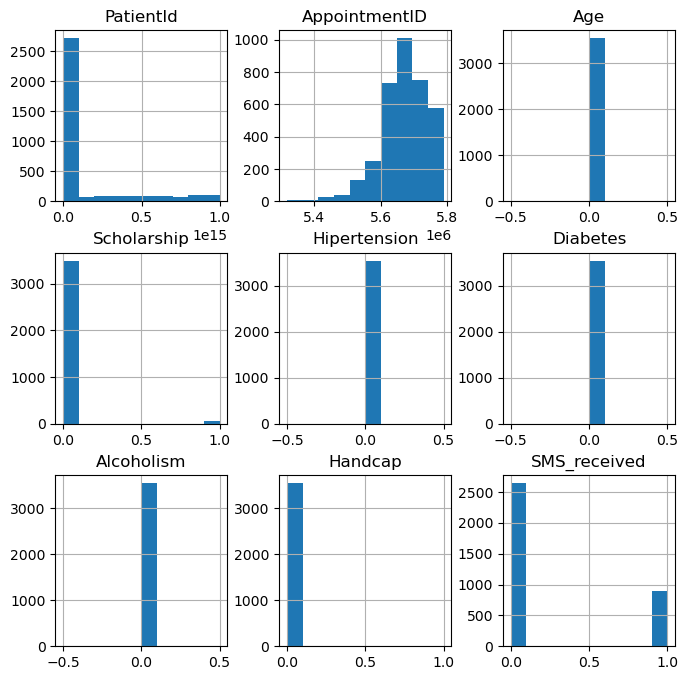

In [868]:
df_age_0.hist(figsize=(8, 8));

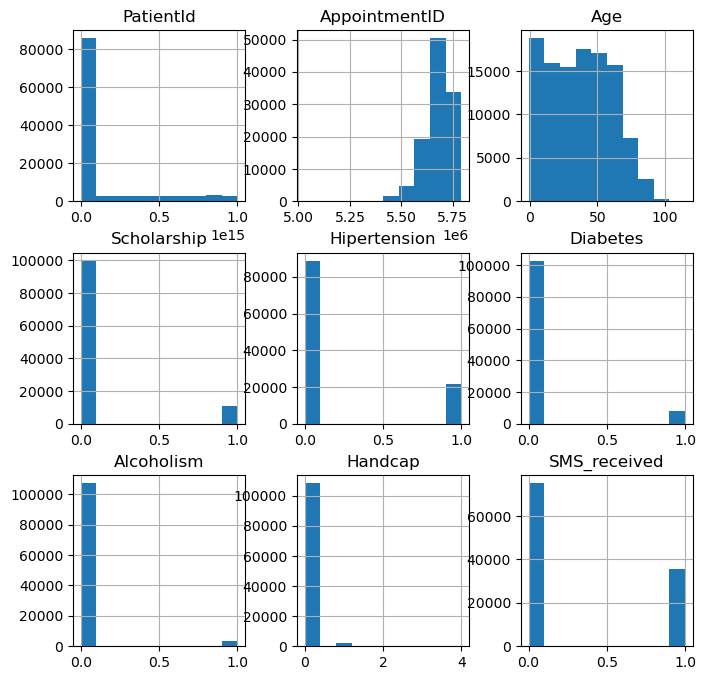

In [869]:
df.hist(figsize=(8, 8));

- There are age values of -1 and 0, which need further investigation.
- There is only one patient with an age of -1. I will drop this row.
- There are 3,539 patients with an age of 0. I think these are newborns.
- The proportion of patients with an age of 0 is 3.2%

In [870]:
df.Neighbourhood.value_counts()

Neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64

In [871]:
df.Scholarship.value_counts()

Scholarship
0    99666
1    10861
Name: count, dtype: int64

In [872]:
df.Hipertension.value_counts()

Hipertension
0    88726
1    21801
Name: count, dtype: int64

In [873]:
df.Diabetes.value_counts()

Diabetes
0    102584
1      7943
Name: count, dtype: int64

In [874]:
df.Alcoholism.value_counts()

Alcoholism
0    107167
1      3360
Name: count, dtype: int64

In [875]:
df.Handcap.value_counts()

Handcap
0    108286
1      2042
2       183
3        13
4         3
Name: count, dtype: int64

- In the `Handcap` column, values other than 0 or 1 are errors that should be removed.

In [876]:
df.SMS_received.value_counts()

SMS_received
0    75045
1    35482
Name: count, dtype: int64

In [877]:
df['No-show'].value_counts()

No-show
No     88208
Yes    22319
Name: count, dtype: int64

In [878]:
df.duplicated().sum()

0

There is no duplicates

### Data Cleaning
#### Define 
- Modify the data types of the `ScheduledDay` and `AppointmentDay` columns to datetime format.
- Modify the data type of the `PatientId` column to string.
- Drop rows that have an age of -1.
- Drop rows that have values other than 0 or 1 in the `Handicap` column.
- Create a new column called `waiting_time` by subtracting the `ScheduledDay` from the `AppointmentDay`

#### Clean

In [879]:
# First, create a copy of the dataset
df_clean = df.copy()

In [880]:
# Modify the data types of the ScheduledDay and AppointmentDay columns to datetime format.
df_clean.ScheduledDay = pd.to_datetime(df_clean.ScheduledDay)
df_clean.AppointmentDay = pd.to_datetime(df_clean.AppointmentDay)

In [881]:
# Modify the data type of the PatientId column to string.
df_clean.PatientId = df_clean.PatientId.astype(str)

In [882]:
# Drop rows that have an age of -1.
df_clean.drop(df_clean[df_clean.Age == -1].index, inplace=True)

In [883]:
# Drop rows that have values other than 0 or 1 in the Handicap column.
df_clean = df_clean.query("Handcap == 1 or Handcap == 0")

In [884]:
# Create a new column called waiting_time by subtracting the ScheduledDay from the AppointmentDay
## Normalizing the "Day" columns to keep just the date information (dropping the time info)
df_clean['ScheduledDay'] = df_clean.ScheduledDay.dt.normalize()

df_clean['waiting_time'] = (df_clean.AppointmentDay - df_clean.ScheduledDay).dt.days

#### Test

In [885]:
# Check the datatype of PatiendId, ScheduledDay and AppointmentDay columns
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110327 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110327 non-null  object             
 1   AppointmentID   110327 non-null  int64              
 2   Gender          110327 non-null  object             
 3   ScheduledDay    110327 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110327 non-null  datetime64[ns, UTC]
 5   Age             110327 non-null  int64              
 6   Neighbourhood   110327 non-null  object             
 7   Scholarship     110327 non-null  int64              
 8   Hipertension    110327 non-null  int64              
 9   Diabetes        110327 non-null  int64              
 10  Alcoholism      110327 non-null  int64              
 11  Handcap         110327 non-null  int64              
 12  SMS_received    110327 non-null  int64              
 13  No-show         110

In [886]:
# Check that there is no age of -1
(df_clean.Age == -1).any()

False

In [887]:
# Check that there is no other values than 0 or 1 in Handcap column
df_clean[(df_clean.Handcap != 0) & (df_clean.Handcap != 1)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,waiting_time


In [888]:
# check waiting_time column
df_clean.waiting_time.head()

0    0
1    0
2    0
3    0
4    0
Name: waiting_time, dtype: int64

In [889]:
# See if there are negative values in waiting time column that indicates that the scheduling is performed after the appointment
(df_clean['waiting_time'] < 0).sum()

5

In [890]:
# remove rows that has negative value for waiting_time
df_clean = df_clean[df_clean.waiting_time >= 0]

In [891]:
(df_clean['waiting_time'] < 0).sum()

0

<a id='eda'></a>
## Exploratory Data Analysis

In [892]:
def plot_categorical_proportion_bar_chart(df, var, title, ylabel, xlabel, tick_label=None):
    """
    Plots a bar chart of the proportion of patients in specific categories.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    var (str): The name of the categorical variable to be used for plotting.
    title (str): The title of the bar chart.
    ylabel (str): The label for the y-axis.
    xlabel (str): The label for the x-axis.
    tick_label (list or None): Optional list of tick labels for the x-axis. Default is None.

    Returns:
    None: The function displays a bar chart.
    
    Description:
    This function takes a DataFrame and a categorical variable, calculates the
    proportion of each category within the variable, and then plots these proportions
    as a bar chart. The chart's title, y-axis label, and x-axis label are specified
    by the user.

    Example:
    >>> import pandas as pd
    >>> df = pd.DataFrame({'gender': ['male', 'female', 'female', 'male', 'female']})
    >>> plot_categorical_proportion_bar_chart(df, 'gender', 'Gender Distribution', 'Proportion', 'Gender')
    """
    props = df[var].value_counts(normalize=True)
    
    bars = plt.bar(props.index, props.values, tick_label=tick_label)
    
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.2%}',
            ha='center',
            va='bottom'
        )
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

> **I'm calculating the proportions based on the count of each category within the 'No-show' and 'Show Up' groups. It helps to mitigate bias due to the unequal distribution of these groups. This ensures that the proportions reflect the relative frequency within each category rather than being skewed by the overall imbalance.**

In [893]:
import numpy as np
import matplotlib.pyplot as plt

def plot_categorical_proportions_by_no_show(df, var, figsize=None, savefig=False):
    """
    Plots the proportions of a categorical variable by 'No-show' status.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    var (str): The name of the categorical variable to be analyzed and plotted.
    figsize (tuple, optional): The size of the figure (width, height). Defaults to None.

    Returns:
    None: The function displays a bar chart showing the proportions of the specified 
    categorical variable for patients who showed up and those who did not.

    Description:
    This function groups the DataFrame by the 'No-show' status and the specified 
    categorical variable, calculates the counts and proportions for each group, 
    and then plots these proportions in a bar chart. The chart includes bars 
    for both 'No-show' and 'Show Up' categories, with appropriate labels and 
    titles for clarity.

    Example:
    >>> import pandas as pd
    >>> df = pd.DataFrame({
    ...     'No-show': ['Yes', 'No', 'Yes', 'No', 'No'],
    ...     'Gender': ['Female', 'Male', 'Female', 'Female', 'Male']
    ... })
    >>> plot_categorical_proportions_by_no_show(df, 'Gender')
    """
    var_by_no_show_counts = df.groupby(['No-show', var], observed=True)[var].count()
    no_show_counts = df['No-show'].value_counts()
    
    # The proportions are calculated in respect to the category itself.
    no_show_props = var_by_no_show_counts['Yes'] / no_show_counts['Yes']
    show_up_props = var_by_no_show_counts['No'] / no_show_counts['No']

    ind = np.arange(len(no_show_props))
    width = 0.35
    locations = ind + width / 2

    fig, ax = plt.subplots(figsize=figsize)  # Create the figure with the desired size
    bars1 = ax.bar(ind, no_show_props.values, width=width, alpha=0.7, label='No Show')
    bars2 = ax.bar(ind + width, show_up_props.values, width=width, alpha=0.7, label='Show Up')
    
    ax.set_ylabel('Proportions')
    ax.set_xlabel(var.title())
    ax.set_xticks(locations)
    ax.set_xticklabels(no_show_props.index)
    ax.set_title(f'Proportions of {var.title()} by No-show')
    ax.legend()
    
    # Adding the proportion values on top of each bar
    for bar in bars1:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.2%}',
            ha='center',
            va='bottom'
        )
    
    for bar in bars2:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.2%}',
            ha='center',
            va='bottom'
        )

    
    if savefig:
        plt.savefig(f'proportions_of_{var.lower()}_by_no_show.png', bbox_inches='tight')
        

    plt.show()

### What is the proportion of patients who didn't show up?

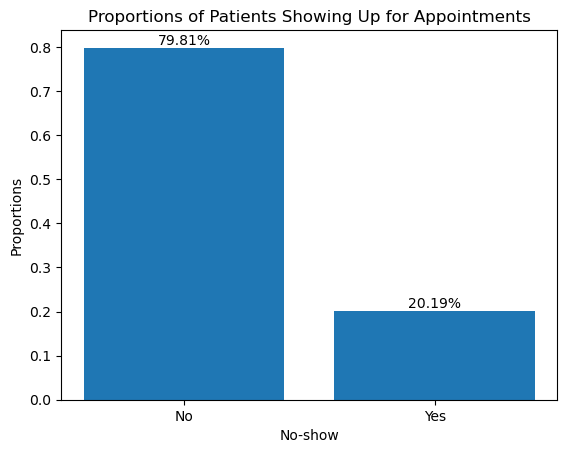

In [894]:
plot_categorical_proportion_bar_chart(df_clean, 'No-show', "Proportions of Patients Showing Up for Appointments",
                                     'Proportions', 'No-show')

- About 80% of the patients show up for their appointments, and 20% of the patients don't.

### What is the proportion of patients who have diabetes?

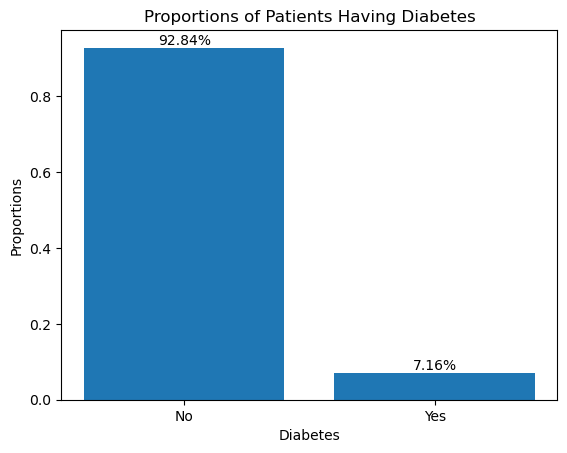

In [895]:
plot_categorical_proportion_bar_chart(df_clean, 'Diabetes', "Proportions of Patients Having Diabetes",
                                     'Proportions', 'Diabetes', tick_label=['No', 'Yes'])

- About 93% of the patients don't have diabetes, and 7% of them do.

In [896]:
df_clean.columns


Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'waiting_time'],
      dtype='object')

### What is the proportion of patients who have hypertension?

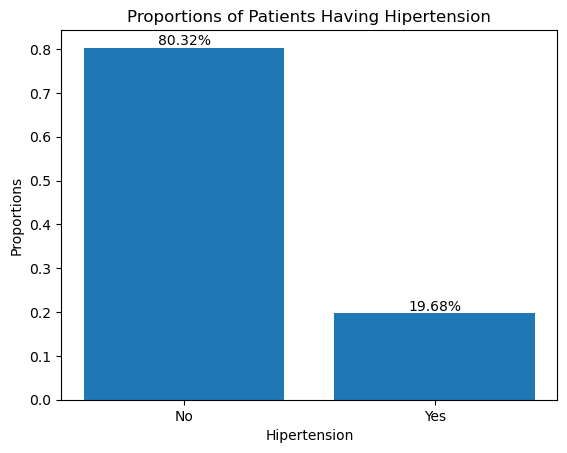

In [897]:
plot_categorical_proportion_bar_chart(df_clean, 'Hipertension', "Proportions of Patients Having Hipertension",
                                     'Proportions', 'Hipertension', tick_label=['No', 'Yes'])

- About 80% of the patients don't have hipertension, and 20% of them do.

### What is the proportion of patients who have alcoholism?

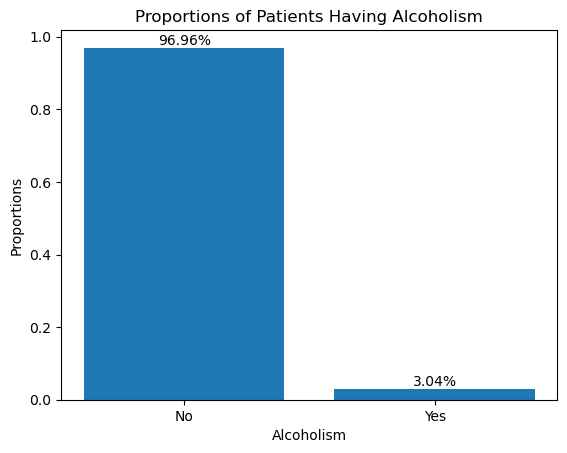

In [898]:
plot_categorical_proportion_bar_chart(df_clean, 'Alcoholism', "Proportions of Patients Having Alcoholism",
                                     'Proportions', 'Alcoholism', tick_label=['No', 'Yes'])

- About 97% of the patients don't have alcoholism, and 3% of them do.

### What is the proportion of patients who have handicap?

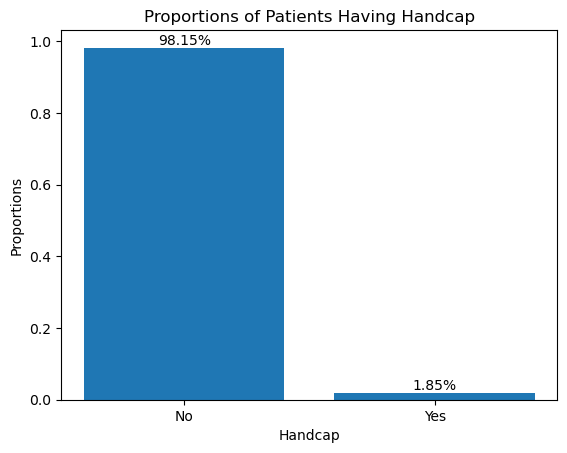

In [899]:
plot_categorical_proportion_bar_chart(df_clean, 'Handcap', "Proportions of Patients Having Handcap",
                                     'Proportions', 'Handcap', tick_label=['No', 'Yes'])

- About 98% of the patients don't have handicap, and 2% of them do.

### What is the gender of the majority of individuals who do not attend their appointments?

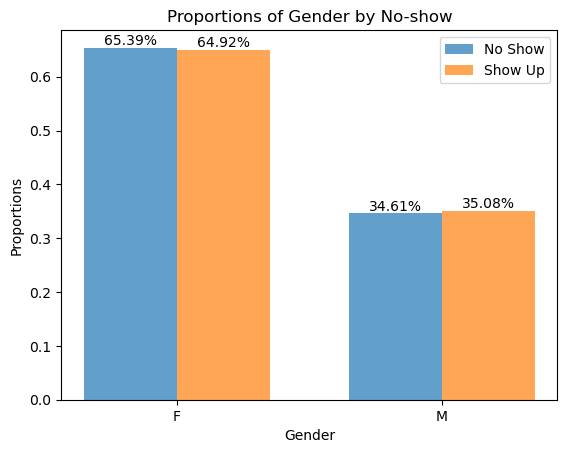

In [900]:
plot_categorical_proportions_by_no_show(df_clean, 'Gender', savefig=True)

- 65.39% of the individuals who didn't show up for their appointments are female.
- There is no significant difference between the proportions. We can't conclude that a female won't show up for her appointment because the proportions of females who do and do not attend their appointments are approximately similar.

### Do people who didn't show up for their appointments have diabetes?

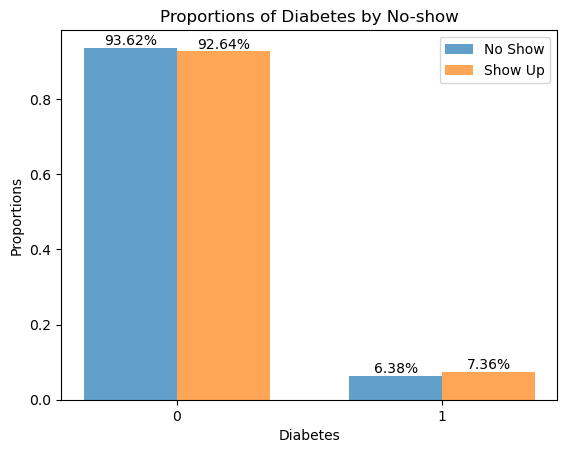

In [901]:
plot_categorical_proportions_by_no_show(df_clean, 'Diabetes')

- There is no significant difference between the proportions here, but in general, the proportion of people with diabetes who show up for their appointments is slightly larger than the proportion of those who do not. This indicates that people with diabetes are more likely to attend their appointments than those without diabetes.

### Do people who didn't show up for their appointments have hypertension?

In [902]:
df_clean.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'waiting_time'],
      dtype='object')

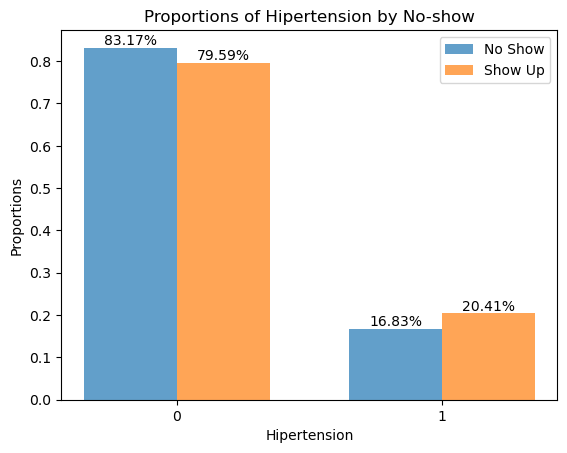

In [903]:
plot_categorical_proportions_by_no_show(df_clean, 'Hipertension')

- 83.17% of the individuals who didn't show up for their appointments do not have hypertension.
- The proportion of people who show up for their appointments and have hypertension is larger than the proportion of those who do not show up and have hypertension. This indicates that people with hypertension are more likely to attend their appointments.

### Do people who didn't show up for their appointments have alcoholism?

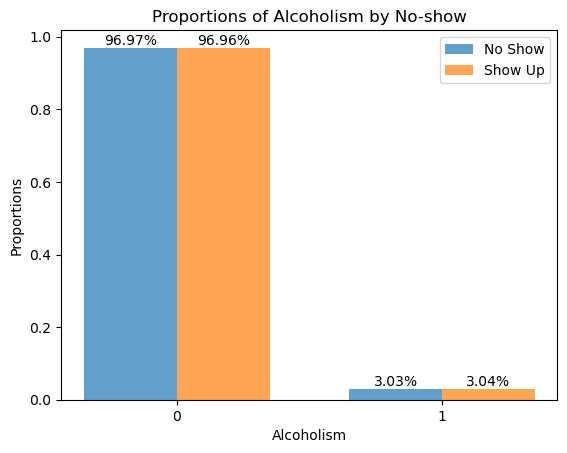

In [904]:
plot_categorical_proportions_by_no_show(df_clean, 'Alcoholism')

- Most of the individuals in this dataset do not have alcoholism.
- We can't distinguish between the people who attend their appointments and those who don't based on whether the individual has alcoholism or not because they are approximately similar..

### Do people who didn't show up for their appointments have a handicap?

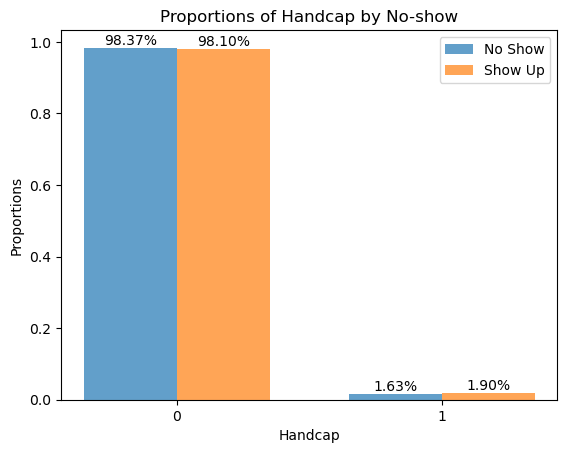

In [905]:
plot_categorical_proportions_by_no_show(df_clean, 'Handcap')

- There is no significant difference between the proportions of people who attend their appointments and those who don't regarding the Handicap feature. This means it won't help us much in distinguishing between them.

### Do people who didn't show up receive an SMS message?

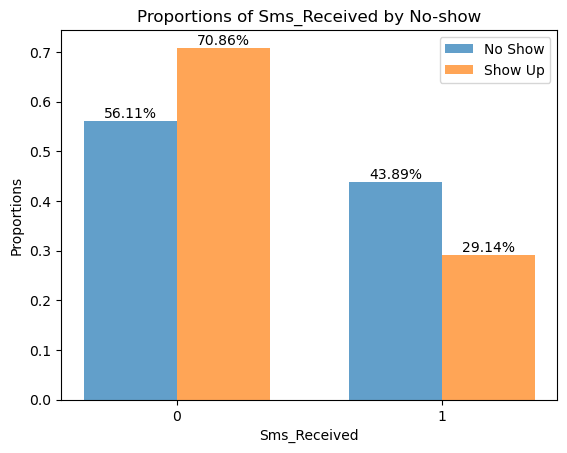

In [906]:
plot_categorical_proportions_by_no_show(df_clean, 'SMS_received', savefig=True)

In [907]:
df_clean.groupby(['No-show', 'SMS_received'])['SMS_received'].count()

No-show  SMS_received
No       0               62389
         1               25660
Yes      0               12498
         1                9775
Name: SMS_received, dtype: int64

- 43.89% of the people who didn't attend their appointments received an SMS.
- The proportion of people who didn't attend their appointments and received an SMS is larger than the proportion of those who attended and received an SMS. This suggests that people who receive an SMS are more likely to not attend their appointments. This seems unusual, doesn't it? We will investigate this further to understand why this is happening.

### Does the number of days between the scheduled day and the actual appointment day affect whether the patient shows up?

In [908]:
df_clean.waiting_time.describe()

count    110322.000000
mean         10.187524
std          15.257955
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_time, dtype: float64

In [909]:
# let's get the proportion of the people who don't wait
no_wait = df_clean[df_clean.waiting_time == 0]
(no_wait.shape[0] / df_clean.shape[0]) * 100

34.884247928790266

- We can see that about 35% of the patients do not wait more than a day; they attend their appointments on the same day they schedule them.

In [910]:
df_clean.waiting_time.head()

0    0
1    0
2    0
3    0
4    0
Name: waiting_time, dtype: int64

In [911]:
# Define the bins and labels for categorization
bins = [-1, 0, 3, 7, 15, 30, 90, 180, float('inf')]
labels = ['Same day: 0', 'Short: 1-3', 'Week: 4-7', 'Fortnight: 8-15', 'Month: 16-30',
          'Quarter: 31-90', 'Semester: 91-180', 'Very long: >180']

# Use pd.cut() to create the categorical column
df_clean['waiting_time_categories'] = pd.cut(df_clean['waiting_time'], bins=bins, labels=labels)

# Check the value counts of the categorical column
print(df_clean['waiting_time_categories'].value_counts())


waiting_time_categories
Same day: 0         38485
Week: 4-7           17477
Month: 16-30        15838
Short: 1-3          14646
Fortnight: 8-15     13509
Quarter: 31-90      10150
Semester: 91-180      217
Very long: >180         0
Name: count, dtype: int64


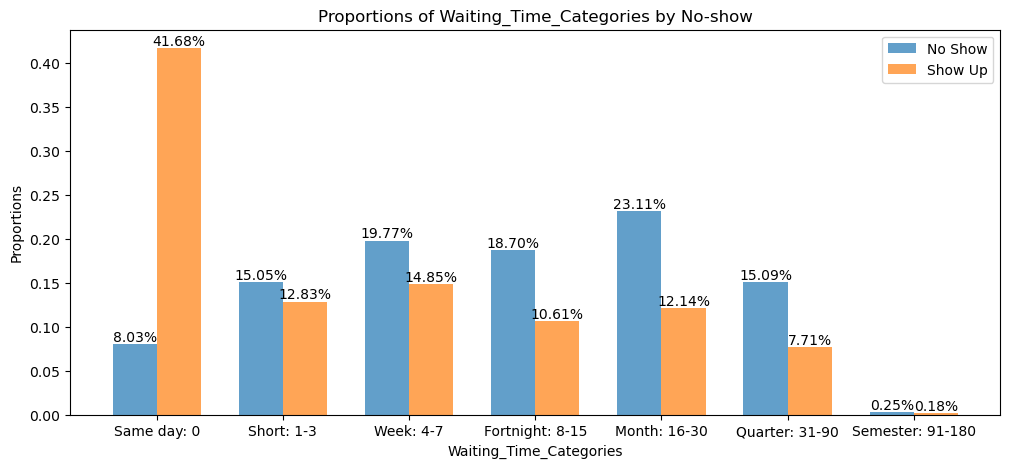

In [912]:
plot_categorical_proportions_by_no_show(df_clean, 'waiting_time_categories', figsize=(12, 5), savefig=True)

- Most people attend their appointments when they schedule them for the same day, as the proportion of those who attended their appointments and scheduled them for the same day is about 41.68% of all the people who attended their appointments. 
- That's an interesting insight! It indicates that a significant proportion of people tend to attend their appointments when the waiting time is short, specifically when the appointment is on the same day they scheduled it. This could imply that shorter waiting times are associated with higher attendance rates, possibly due to factors like urgency, convenience, or a reduced likelihood of forgetting the appointment.
- Additionally, the longer the waiting time increases, the higher the proportion of people who don't attend their appointments.s..

In [913]:
sms_wait_counts = df_clean.groupby(['SMS_received', 'waiting_time_categories'], observed=True)['waiting_time_categories'].count()
sms_counts = df_clean.SMS_received.value_counts()
no_sms_wait_props = sms_wait_counts[0] / sms_counts[0]
sms_wait_props = sms_wait_counts[1] / sms_counts[1]

In [914]:
sms_wait_props['Same day: 0'] = 0

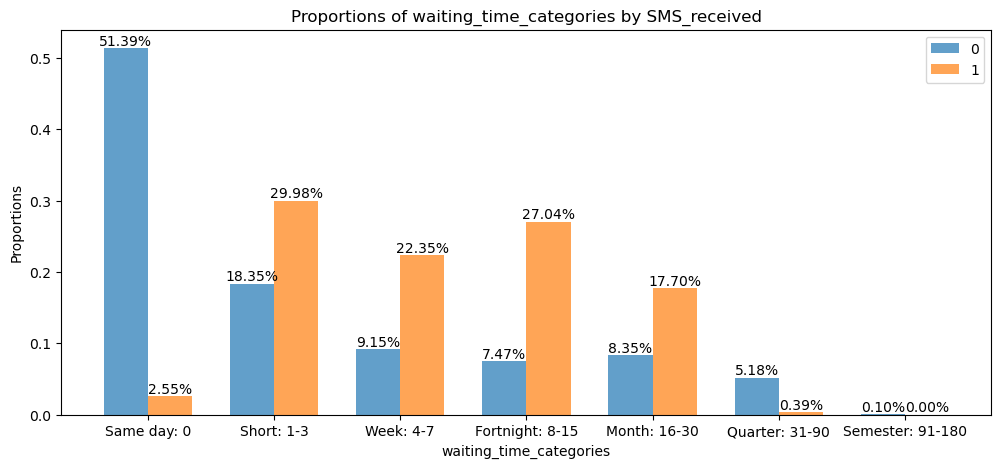

In [915]:
ind = np.arange(len(no_sms_wait_props))
width = 0.35
locations = ind + width / 2

fig, ax = plt.subplots(figsize=(12, 5))  # Create the figure with the desired size
bars1 = ax.bar(ind, no_sms_wait_props.values, width=width, alpha=0.7, label='0')
bars2 = ax.bar(ind + width, sms_wait_props.values, width=width, alpha=0.7, label='1')

ax.set_ylabel('Proportions')
ax.set_xlabel('waiting_time_categories')
ax.set_xticks(locations)
ax.set_xticklabels(no_sms_wait_props.index)
ax.set_title('Proportions of waiting_time_categories by SMS_received')
ax.legend()

for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2%}', ha='center', va='bottom')
for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2%}', ha='center', va='bottom')

plt.savefig('waiting_time_categories_by_SMS_received.png', bbox_inches='tight')
plt.show()

- We can see that 51.39% of the people who scheduled an appointment on the same day did not receive an SMS. We also know that most of these people attended their appointments. This might explain why most of the people who attend their appointments do not receive an SMS.


### What is the relationship between the age of the patient and whether they showed up or not?

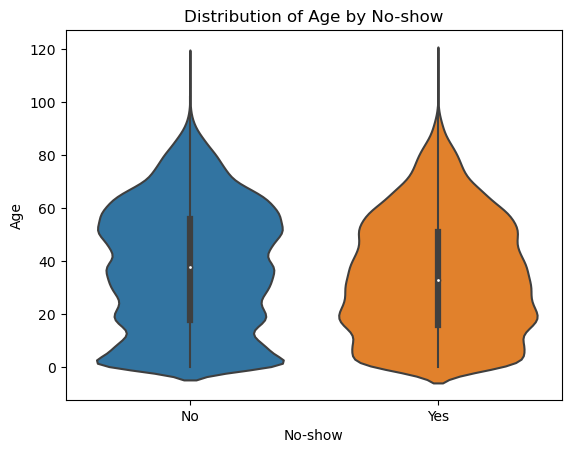

In [916]:
sns.violinplot(df_clean, x='No-show', y='Age')
plt.title('Distribution of Age by No-show')
plt.savefig('age_by_No_show.png')
plt.show()

There is no significant difference between the age distribution of people who attend their appointments and those who don't. However, a closer look at the data reveals a subtle trend:
- Individuals who attend their appointments tend to be slightly older on average compared to those who miss their appointments.
- The density of people attending their appointments peaks in the age range of 40-60 years.
- Conversely, the density of people who miss their appointments peaks in the age range of 20-40 years.
  
This indicates that while both age groups are represented in both attendance and non-attendance categories, older individuals (40-60 years) are more likely to attend their appointments than younger individuals (20-40 years).

In [917]:
# let's create age groups to take a closer look
# Define the bins and labels for categorization
age_bins = [0, 12, 18, 35, 60, 120]
age_labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

df_clean['age_groups'] = pd.cut(df_clean.Age, age_bins, labels=age_labels)

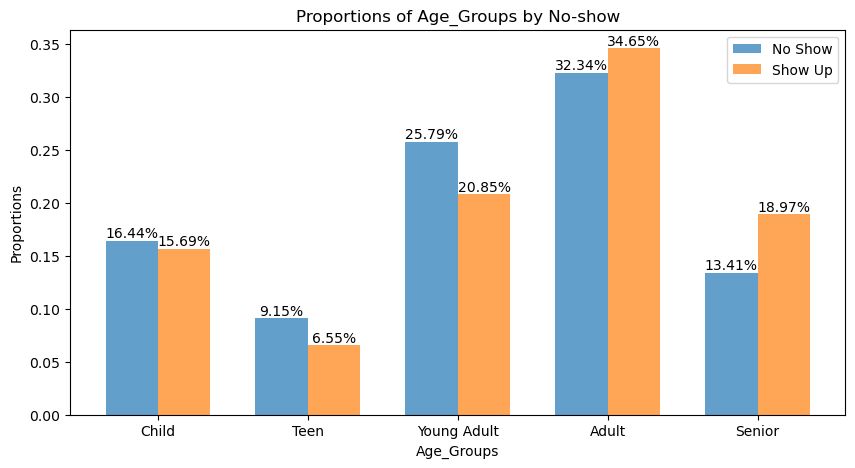

In [918]:
plot_categorical_proportions_by_no_show(df_clean, 'age_groups', figsize=(10, 5), savefig=True)

- From this graph, we can verify our earlier observation. For younger patients, the proportion of people who don't attend their appointments is higher than those who do. In contrast, for older patients, the proportion of people who attend their appointments is higher than those who don't.

### Is there a specific neighborhood that has a higher no-show rate?

In [919]:
neighbourhood_counts = df_clean.Neighbourhood.value_counts(ascending=True)[20:]
neighbourhood_counts

Neighbourhood
DO MOSCOSO          411
SANTA LUÍZA         422
BARRO VERMELHO      423
SANTA LÚCIA         437
SANTA CECÍLIA       448
                   ... 
ITARARÉ            3507
JARDIM DA PENHA    3872
RESISTÊNCIA        4419
MARIA ORTIZ        5805
JARDIM CAMBURI     7717
Name: count, Length: 61, dtype: int64

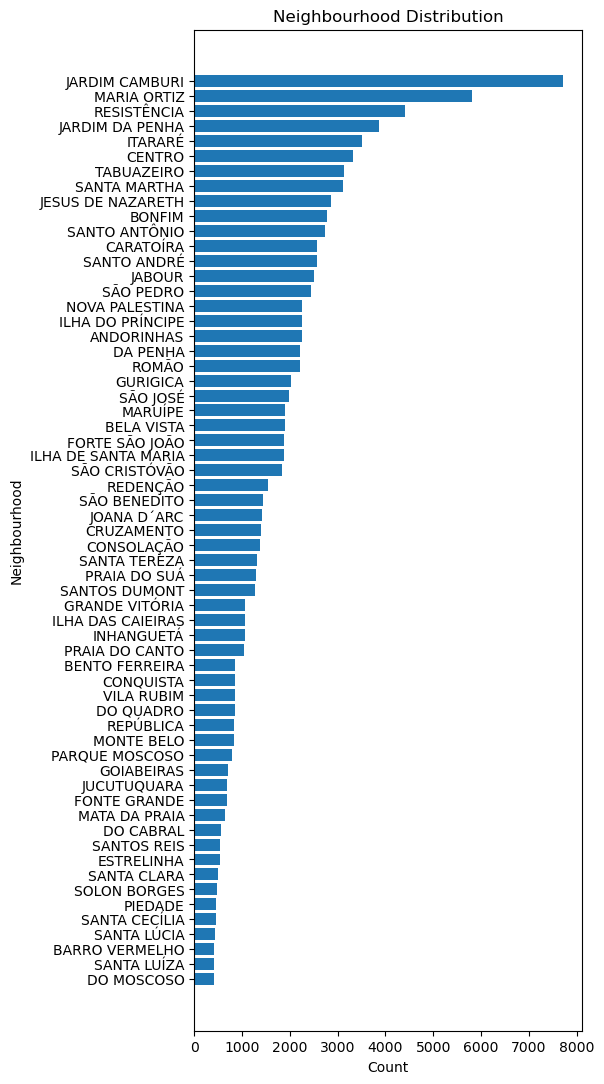

In [920]:
plt.figure(figsize=(5, 13))
plt.barh(neighbourhood_counts.index, width=neighbourhood_counts.values)
plt.title('Neighbourhood Distribution')
plt.xlabel('Count')
plt.ylabel('Neighbourhood')
plt.show()

- The neighborhood with the highest number of appointments is Jardim Camburi with 7717 appointments.

In [921]:
# calculate the counts of neighbourhood by 'No-show'
neighbourhood_by_show_counts = df_clean.groupby(['No-show', 'Neighbourhood'])['Neighbourhood'].count().sort_values()

In [922]:
# Be sure that the two categories has all neighbors
set(neighbourhood_by_show_counts['No'].index) - set(neighbourhood_by_show_counts['Yes'].index)

{'PARQUE INDUSTRIAL'}

In [923]:
neighbourhood_by_show_counts = pd.concat((neighbourhood_by_show_counts, pd.Series([0], index=[('Yes', 'PARQUE INDUSTRIAL')])))
neighbourhood_by_show_counts['Yes']['PARQUE INDUSTRIAL']

0

In [924]:
neighbourhoods = neighbourhood_by_show_counts['No'].index

In [925]:
show_counts = df_clean['No-show'].value_counts()
neighbourhood_show_up_counts = neighbourhood_by_show_counts['No'][neighbourhoods] / show_counts['No']
neighbourhood_no_show_counts = neighbourhood_by_show_counts['Yes'][neighbourhoods] / show_counts['Yes']

In [926]:
neighbourhood_show_up_counts

PARQUE INDUSTRIAL    0.000011
AEROPORTO            0.000080
ILHA DO FRADE        0.000091
ILHA DO BOI          0.000363
PONTAL DE CAMBURI    0.000647
                       ...   
CENTRO               0.029858
JARDIM DA PENHA      0.036809
RESISTÊNCIA          0.039944
MARIA ORTIZ          0.052085
JARDIM CAMBURI       0.071006
Length: 80, dtype: float64

In [927]:
neighbourhood_no_show_counts

PARQUE INDUSTRIAL    0.000000
AEROPORTO            0.000045
ILHA DO FRADE        0.000090
ILHA DO BOI          0.000135
PONTAL DE CAMBURI    0.000539
                       ...   
CENTRO               0.031473
JARDIM DA PENHA      0.028330
RESISTÊNCIA          0.040497
MARIA ORTIZ          0.054730
JARDIM CAMBURI       0.065775
Length: 80, dtype: float64

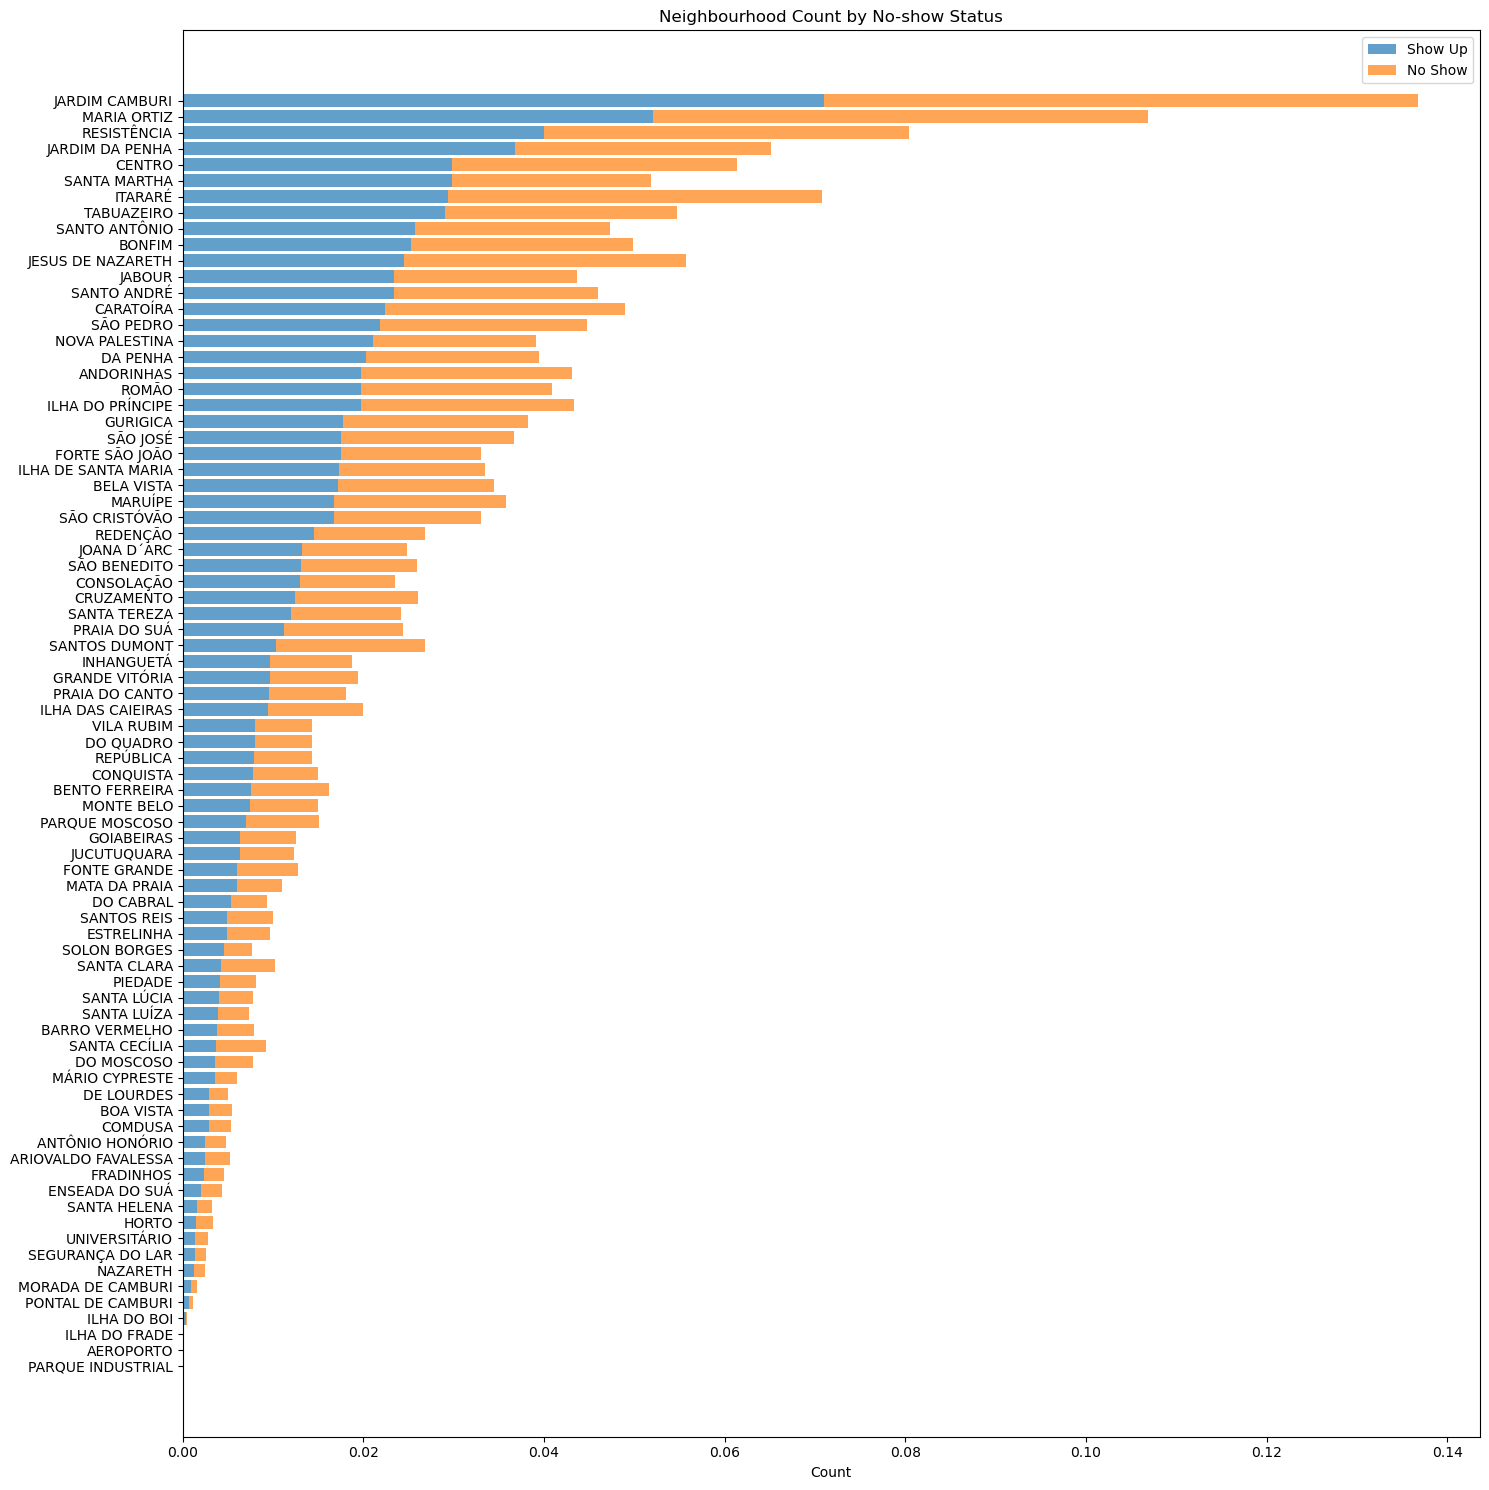

In [928]:
ind = np.arange(len(neighbourhood_no_show_counts))
width = 0.35

plt.figure(figsize=(15, 15))
plt.barh(ind, width=neighbourhood_show_up_counts.values, alpha=0.7, label='Show Up')
plt.barh(ind, width=neighbourhood_no_show_counts.values, left=neighbourhood_show_up_counts.values, alpha=0.7, label='No Show')

plt.yticks(ind, neighbourhoods)
plt.xlabel('Count')
plt.title('Neighbourhood Count by No-show Status')
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.savefig('neighbourhood_count_by_no_show.png')
plt.show()


- The proportion of patients from Jardim Camburi who attended their appointments is larger than the proportion of those from the same neighborhood who didn't attend.

- There are patients who attend and do not attend appointments in all neighborhoods except for Parque Industrial, which has the lowest number of appointments..

### What is the proportion of patients who didn't attend their appointments and received a scholarship?

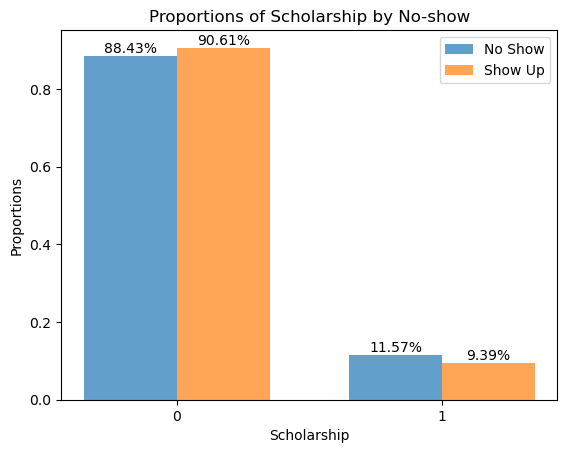

In [929]:
plot_categorical_proportions_by_no_show(df_clean, 'Scholarship')

- There is no significant difference between the proportions of people who attended and didn't attend their appointments regarding receiving a scholarship. The proportion of people who didn't attend their appointments and received a scholarship is slightly larger than the proportion of people who attended and received a scholarship.

<a id='conclusions'></a>
## Conclusions

#### Let's summarize our findings:

**Insights about all patients:**

- About 80% of the patients show up for their appointments, and 20% of the patients don't.
- About 93% of the patients don't have diabetes, and 7% of them do.
- About 80% of the patients don't have hypertension, and 20% of them do.
- About 97% of the patients don't have alcoholism, and 3% of them do.
- About 98% of the patients don't have handicap, and 2% of them do.

#### Insights that focus more on knowing the characteristics of the people who didn't attend their appointments:
##### Regarding gender

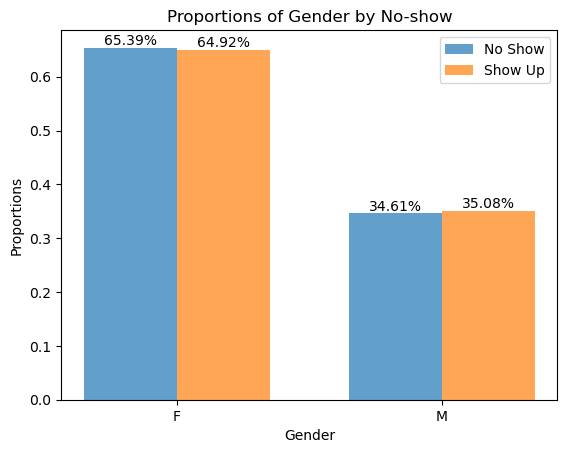
- 65.39% of the individuals who didn't show up for their appointments are female.
- There is no significant difference between the proportions. We can't conclude that a female won't show up for her appointment because the proportions of females who do and do not attend their appointments are approximately similar.

##### Regarding diabetes, hypertension, alcoholism, and handicap
- There is no significant difference between the proportions here, but in general, the proportion of people with diabetes who show up for their appointments is slightly larger than the proportion of those who do not. This indicates that people with diabetes are more likely to attend their appointments than those without diabetes.
- 83.17% of the individuals who didn't show up for their appointments do not have hypertension.
- The proportion of people who show up for their appointments and have hypertension is larger than the proportion of those who do not show up and have hypertension. This indicates that people with hypertension are more likely to attend their appointments.
- Most of the individuals in this dataset do not have alcoholism.
- We can't distinguish between the people who attend their appointments and those who don't based on whether the individual has alcoholism or not because the proportions are approximately similar.
- There is no significant difference between the proportions of people who attend their appointments and those who don't regarding the Handicap feature. This means it won't help us much in distinguishing between them.

##### Regarding SMS Received and waiting time
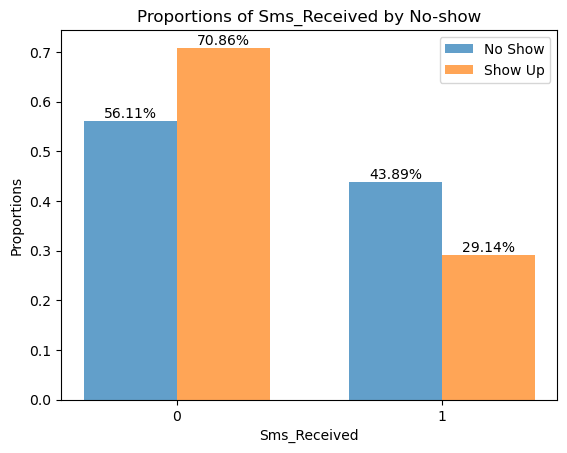
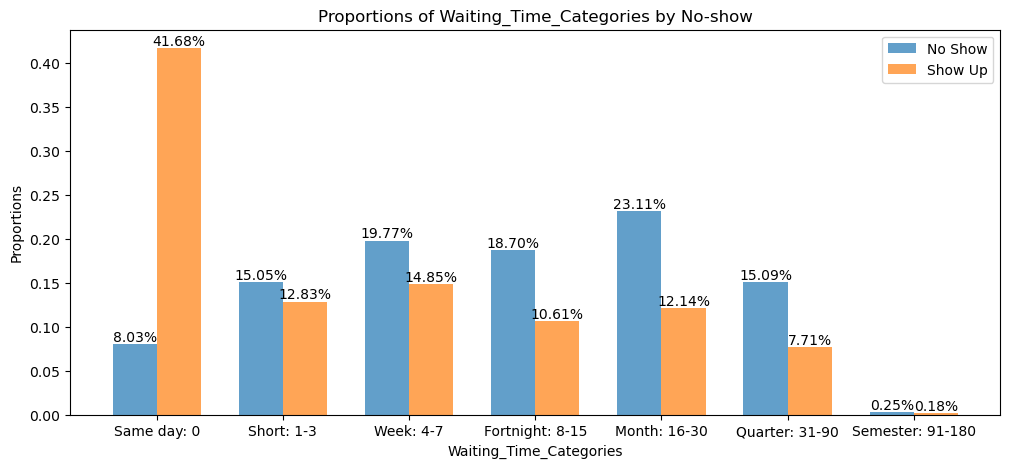
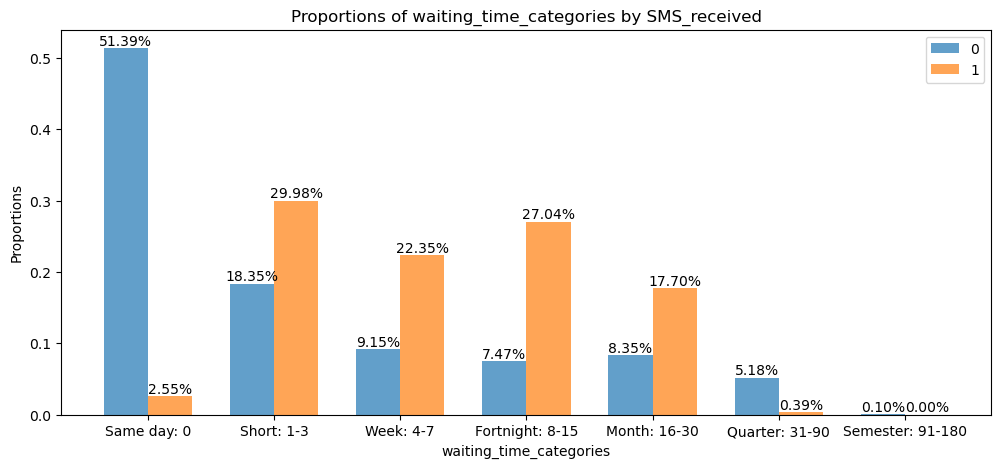

- 43.89% of the people who didn't attend their appointments received an SMS.
- The proportion of people who didn't attend their appointments and received an SMS is larger than the proportion of those who attended and received an SMS. This suggests that people who receive an SMS are more likely to not attend their appointments. This seems unusual, doesn't it? We will investigate this further to understand why this is happening
- We can see that about 35% of the patients do not wait more than a day; they attend their appointments on the same day they schedule them.
- Most people attend their appointments when they schedule them for the same day, as the proportion of those who attended their appointments and scheduled them for the same day is about 41.68% of all the people who attended their appointments. 
- That's an interesting insight! It indicates that a significant proportion of people tend to attend their appointments when the waiting time is short, specifically when the appointment is on the same day they scheduled it. This could imply that shorter waiting times are associated with higher attendance rates, possibly due to factors like urgency, convenience, or a reduced likelihood of forgetting the appointment.
- Additionally, the longer the waiting time increases, the higher the proportion of people who don't attend their appointments.
- We can see that 51.39% of the people who scheduled an appointment on the same day did not receive an SMS. We also know that most of these people attended their appointments. ***This might explain why most of the people who attend their appointments do not receive an SMS.***

##### Regarding age
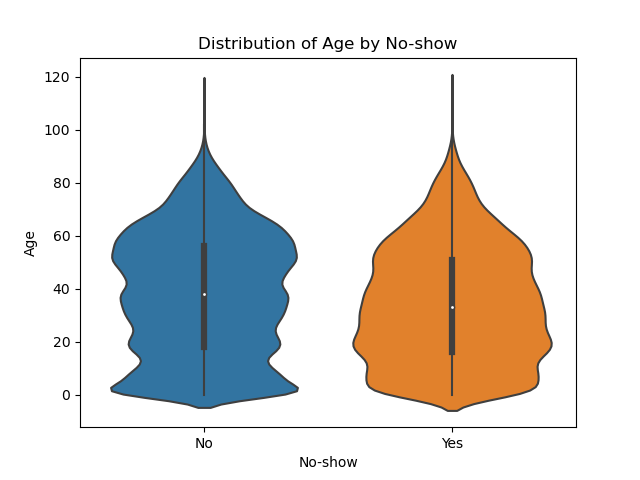
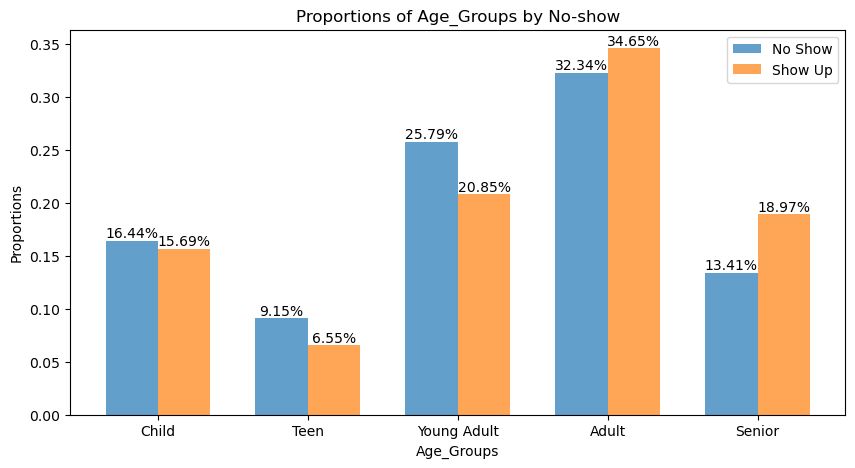

- There is no significant difference between the age distribution of people who attend their appointments and those who don't. However, a closer look at the data reveals a subtle trend:
    - Individuals who attend their appointments tend to be slightly older on average compared to those who miss their appointments.
    - The density of people attending their appointments peaks in the age range of 40-60 years.
    - Conversely, the density of people who miss their appointments peaks in the age range of 20-40 years.
    - This indicates that while both age groups are represented in both attendance and non-attendance categories, older individuals (40-60 years) are more likely to attend their appointments than younger individuals (20-40 years).

- For younger patients, the proportion of people who don't attend their appointments is higher than those who do. In contrast, for older patients, the proportion of people who attend their appointments is higher than those who don't.

##### Regarding neighborhood

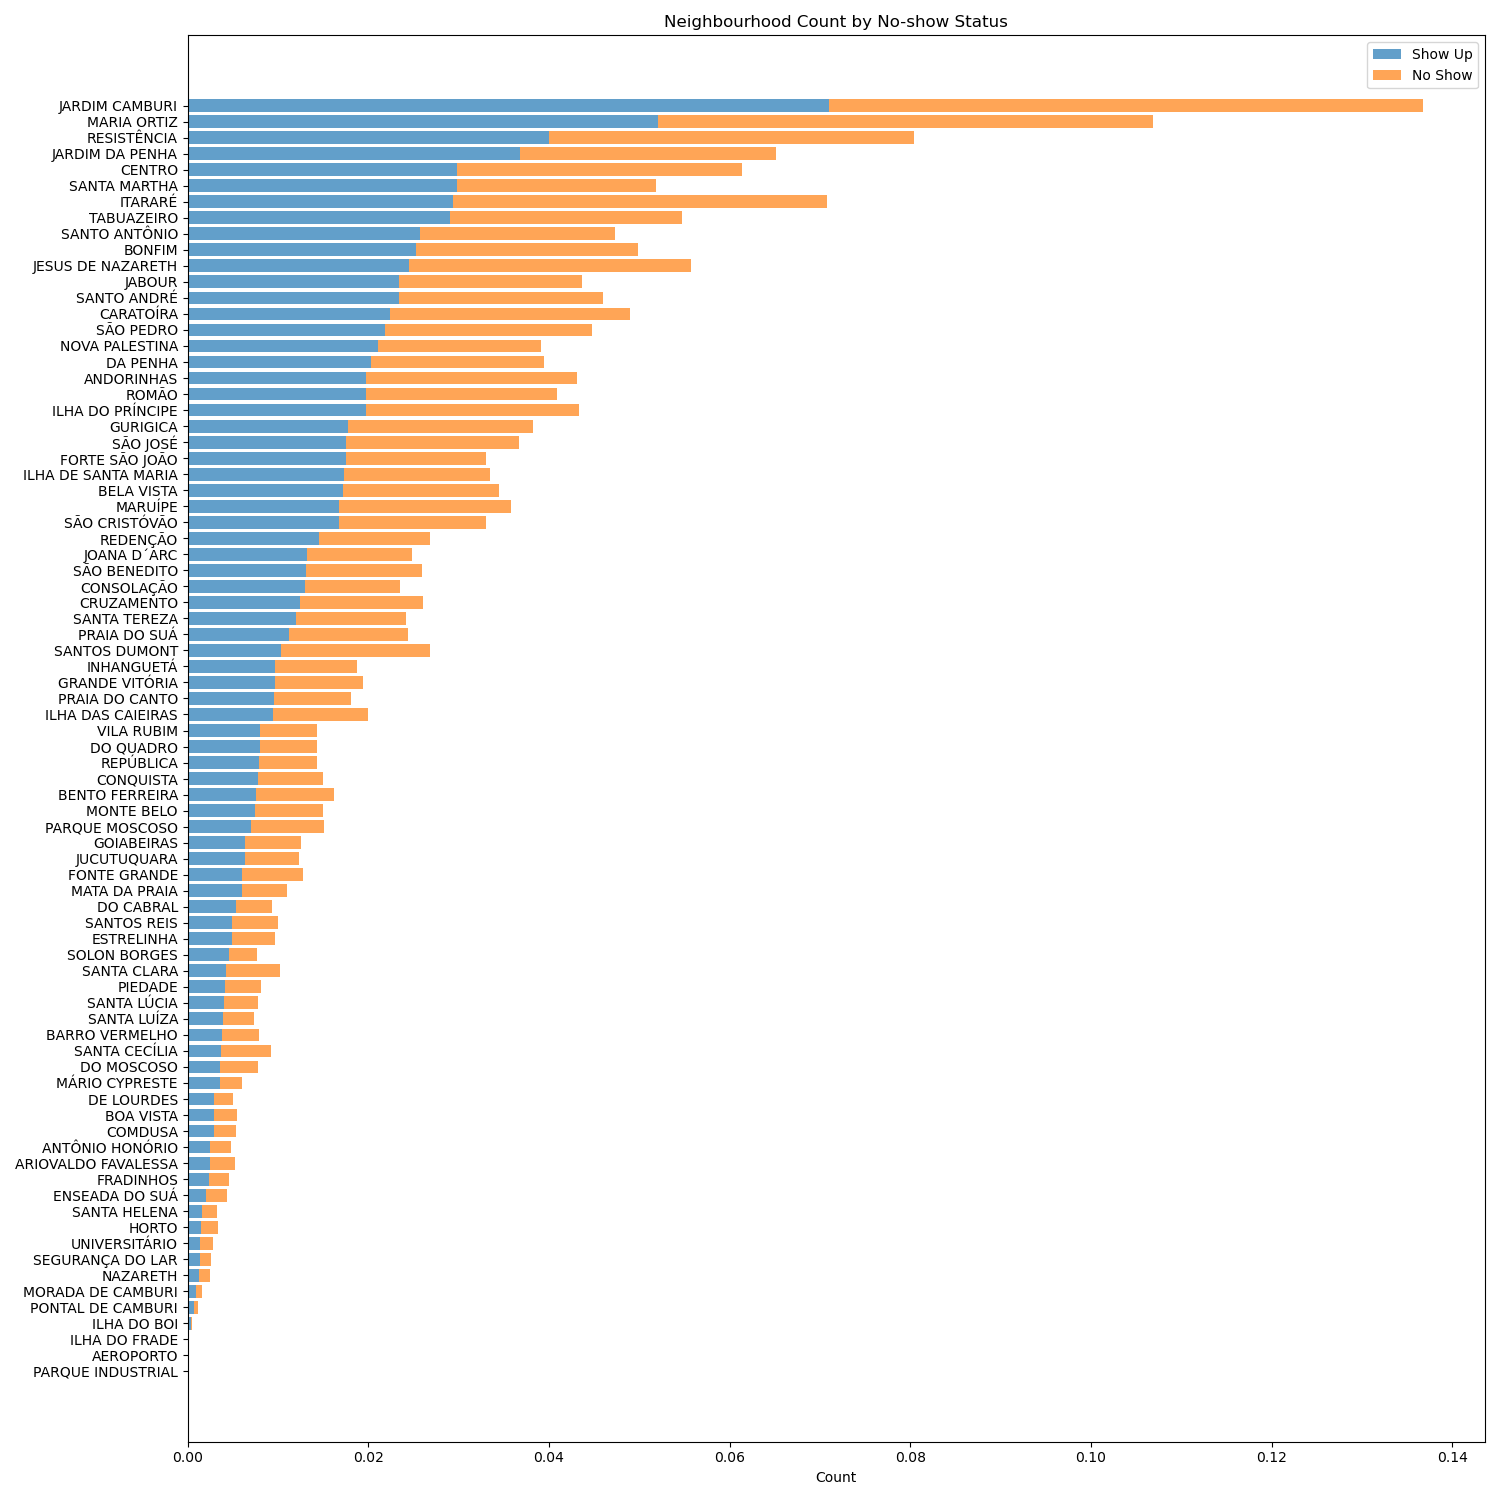
- The neighborhood with the highest number of appointments is Jardim Camburi with 7717 appointments.
- The proportion of patients from Jardim Camburi who attended their appointments is larger than the proportion of those from the same neighborhood who didn't attend.
- In all neighborhoods except for Parque Industrial, there are patients who attend and do not attend appointments, with Parque Industrial having the lowest number of appointments.

##### Regarding Scholarship
- There is no significant difference between the proportions of people who attended and didn't attend their appointments regarding receiving a scholarship. The proportion of people who didn't attend their appointments and received a scholarship is slightly larger than the proportion of people who attended and received a scholarship.

### Conclusions on Non-Attendance of Appointments

**Key Factors Influencing Attendance:**

1. **Waiting Time**:
   - **Impact**: Waiting time is the most significant factor affecting attendance rates. As waiting time increases, the number of patients who do not attend their appointments also increases.
   - **Action**: Strategies to decrease waiting times should be prioritized. This might include optimizing scheduling processes, increasing appointment slots, or implementing urgent care options.

2. **Age**:
   - **Impact**: Younger patients are more likely to miss their appointments compared to older patients.
   - **Action**: Focused engagement and reminder strategies should be developed for younger patients. This could involve tailored communication, flexible scheduling, or educational initiatives about the importance of attending medical appointments.

3. **Chronic Conditions**:
   - **Impact**: While individuals with diabetes, hypertension, alcoholism, or handicap are more likely to attend their appointments, the difference in attendance rates based on these conditions is not substantial enough to serve as a distinguishing factor.
   - **Action**: Continue supporting these patients with targeted care and reminders, but also focus on other variables that might better predict attendance.

4. **SMS Reminders**:
   - **Impact**: Interestingly, patients who receive SMS reminders are more likely to miss their appointments.
   - **Action**: Revise the SMS reminder strategy. Consider the timing, frequency, and content of reminders. Perhaps implementing more personalized or interactive reminder systems could be more effective.

5. **Same-Day Appointments**:
   - **Impact**: Patients who schedule and attend same-day appointments are highly likely to keep their appointments and typically do not receive SMS reminders.
   - **Action**: Increase the availability of same-day appointments and reduce reliance on SMS reminders for these slots.

6. **Neighborhood**:
   - **Impact**: Certain neighborhoods have higher attendance rates and appointment volumes, such as Jardim Camburi.
   - **Action**: Analyze and understand the factors contributing to higher attendance in these neighborhoods. Implement similar practices in areas with lower attendance rates.

### Summary

The most impactful factor on appointment attendance is waiting time, with shorter waiting times correlating with higher attendance rates. Efforts should be made to reduce waiting times through improved scheduling and increasing appointment availability. Younger patients require additional focus to improve their attendance rates. Although patients with certain chronic conditions tend to attend their appointments more reliably, these conditions do not significantly distinguish attendees from non-attendees. The current SMS reminder system appears counterproductive and should be re-evaluated. Additionally, increasing same-day appointment slots and analyzing neighborhood-specific factors can help enhance overall attendance rates.

#### Limitations
- A significant limitation of this data is that some features may not be very helpful in determining the characteristics of people who didn't attend their appointments. I think we need more features, such as one indicating whether the patient is employed or not.
- The data is imbalanced, with the majority of data pertaining to patients who attend their appointments.